# Model Testing

## Data and Library Import

In [1]:
from numpy import array
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd
from numpy import loadtxt
from keras.models import load_model

amc_model = load_model('AMCModel.h5')
gme_model = load_model('GMEModel.h5')

### Import Testing Data

In [2]:
amc_testing = pd.read_csv(r'./Data/AMC_testing_data.csv', index_col=0, parse_dates=True)
gme_testing = pd.read_csv(r'./Data/GME_testing_data.csv', index_col=0, parse_dates=True)

## Split Sequence Function Definition

In [3]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

## Testing Function Definition

In [4]:
def testing_data_prep(testing_set, model):
    n_steps = 8
    #data here taken from csv columns, have a look at the tetsing set for the format
    price_testing = testing_set['Price'].values
    price_open_testing = testing_set['Open'].values
    price_high_testing = testing_set['High'].values
    price_low_testing = testing_set['Low'].values
    price_vol_testing = testing_set['Vol.'].values
    price_change_testing = testing_set['Change %'].values

    #runs the above split function to make the datset into small arrays with 8 steps each, copy the function for prediction
    #this will need to be done to any prediction, it needs 8 steps behind to predict
    Tprice, y = split_sequence(price_testing, n_steps)
    Tprice = Tprice.reshape((Tprice.shape[0], n_steps, 1))
    
    Topen, y = split_sequence(price_open_testing, n_steps)
    Topen = Topen.reshape((Topen.shape[0], n_steps, 1))
    
    Thigh, y = split_sequence(price_high_testing, n_steps)
    Thigh = Thigh.reshape((Thigh.shape[0], n_steps, 1))
    
    Tlow, y = split_sequence(price_low_testing, n_steps)
    Tlow = Tlow.reshape((Tlow.shape[0], n_steps, 1))
    
    TVol, y = split_sequence(price_low_testing, n_steps)
    TVol = Tlow.reshape((Tlow.shape[0], n_steps, 1))
    
    Tchange, y = split_sequence(price_change_testing, n_steps)
    Tchange = Tchange.reshape((Tchange.shape[0], n_steps, 1))

    #This line takes all of the split arrays and puts them together, shapinng the data structure to fit the lstm
    Ttraining = np.concatenate((Tprice, Topen, Thigh, Tlow, Tchange), axis = 2)

    #may have to run this line once to prune the end of the data
    #this line is just for accuracy testing, it aligns the testing dataset with the first output
    price_change_testing_test = price_change_testing[8:]
    
    #predicts using the correct dataset
    predictions = model.predict(Ttraining)
    mse = mean_squared_error(price_change_testing_test, predictions)
    print(mse)
    #with the predictions you can model them or if its just one output it
    plt.plot(predictions)
    plt.show()
    plt.plot(price_change_testing_test)
    plt.show()
    
    lstm_acc_df = pd.DataFrame()
    price_change_testing_test = price_change_testing_test.reshape(price_change_testing_test.shape[0],1)
    lstm_acc_df['Actual'] = price_change_testing_test[:,0]
    lstm_acc_df['Predict'] = predictions[:,0]
    lstm_acc_df.plot()

## Testing Function Calls

0.09818394073064214


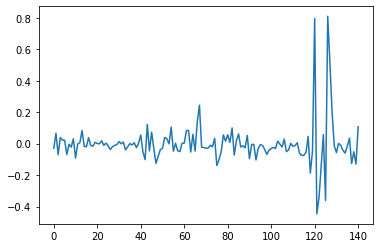

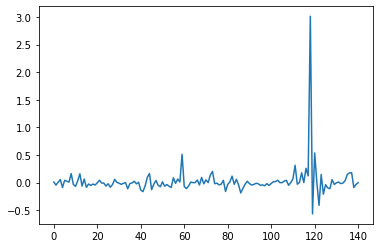

0.06818202466056945


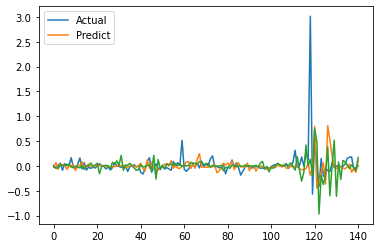

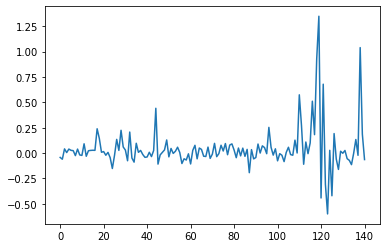

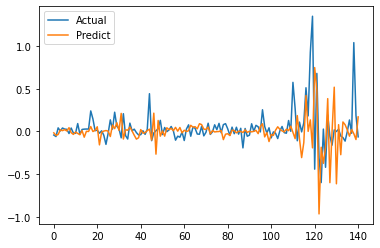

In [5]:
#runs the testing function, with some modifications and the correct dataset you will be able to fun a similar function
testing_data_prep(amc_testing, amc_model)
testing_data_prep(gme_testing, gme_model)